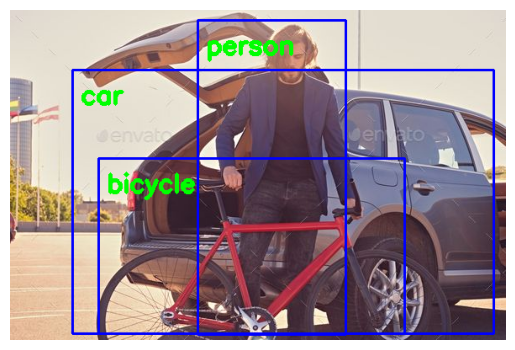

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[18  1]
[88]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 75]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 77]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 77]
[1]
[90  1]
[90]
[90]
[77]
[77 75  1]
[77 75  1]
[77 75  1]
[77 75  1]
[77 75  1]
[77 75]
[77 75  1]
[77 75  1]
[77 75  1]
[77 75]
[77 75  1]
[77  1]
[77  1]
[77  1]
[ 1 77]
[ 1 77]
[77  1]
[

In [ ]:
import cv2
import matplotlib.pyplot as plt


frozen_model = r"C:\Users\pitla\Downloads\frozen_inference_graph.pb"
config_file = r"C:\Users\pitla\Downloads\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"

model = cv2.dnn_DetectionModel(frozen_model, config_file)
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)


file_name = r"C:\Users\pitla\Downloads\labels.txt"
with open(file_name, 'rt') as f:
    classLabels = f.read().rstrip('\n').split('\n')


img = cv2.imread(r"C:\Users\pitla\Downloads\boy.jpg")


classIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

font_scale = 1
font = cv2.FONT_HERSHEY_SIMPLEX

for classInd, conf, boxes in zip(classIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classLabels[classInd-1], (boxes[0]+10, boxes[1]+40),
                font, font_scale, (0, 255, 0), 3)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")
plt.show()
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    classIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    print(classIndex)
    if (len(classIndex) != 0):
        for classInd, conf, boxes in zip(classIndex.flatten(), confidence.flatten(), bbox):
            if(classInd<=80):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[classInd - 1],
                        (boxes[0] + 10, boxes[1] + 40),
                        font, fontScale=font_scale,
                        color=(0, 255, 0), thickness=3)

    cv2.imshow("Object Detection", frame)

    if cv2.waitKey(2) & 0xff == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()